In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [3]:
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\gas_turbines.csv")

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

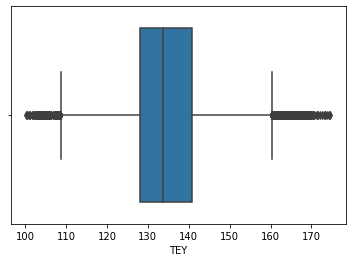

In [8]:
sns.boxplot(df['TEY'],data=df)

In [9]:
Q1=df['TEY'].quantile(0.25)
Q3=df['TEY'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
df['TEY']=np.where(df['TEY']>upper_wisker,upper_wisker,np.where(df['TEY']<lower_wisker,lower_wisker,df['TEY']))


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

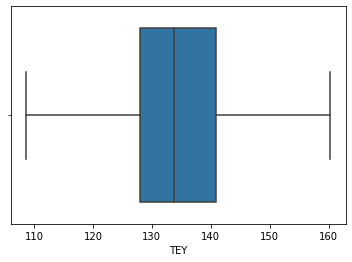

In [10]:
sns.boxplot(df['TEY'],data=df)

<AxesSubplot:>

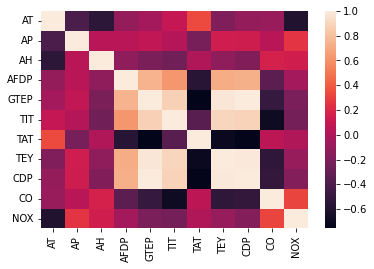

In [11]:
# correlation matrix
sns.heatmap(df.corr())

In [12]:
y=df['TEY']
X=df.drop(['TEY'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 10)
(3008, 10)
(12031,)
(3008,)


In [14]:
y_test

13312    134.46
12627    111.88
6393     133.72
4990     133.79
12462    110.77
          ...  
11478    119.25
12302    133.74
13093    146.31
2699     150.07
12506    111.77
Name: TEY, Length: 3008, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 0.47056415 -0.81350628  0.56176672 ... -1.53396833  1.38554193
  -1.26033592]
 [ 1.87696832 -0.23812732 -0.8085116  ...  0.19687597  0.38193337
  -0.43948609]
 [-1.06016627  0.3683532   0.02618307 ...  1.70558468 -0.74786202
  -0.55565494]
 ...
 [-0.18266419  0.25949772 -0.22487857 ... -1.51311479  1.66852278
  -0.01228763]
 [-1.63532714  0.53941181  0.66076877 ... -1.46506096  1.45834724
   4.35995498]
 [-1.55058329  2.0633885   0.26991392 ... -0.37704988  0.11086035
   1.22540899]]
[[ 8.37434948e-01 -4.71389059e-01 -2.35185234e-01 ...  1.02581678e-01
  -3.14742847e-01 -6.90897711e-01]
 [ 3.55809603e-01  1.81743809e-01  8.28143198e-01 ... -1.19215152e+00
   3.32445677e-01 -1.10266451e+00]
 [ 3.30954933e-01 -1.13721060e-01  2.78043117e-01 ...  1.82608190e-02
   1.38072036e-03 -3.09131614e-01]
 ...
 [ 1.49581931e+00 -7.66853928e-01 -1.05608930e+00 ...  8.84136309e-01
  -1.41784951e-01 -8.75886053e-01]
 [ 7.46345225e-01 -2.22576538e-01 -5.52949867e-01 ...  1.09267177e+00
  -5.04104577

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [19]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [20]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [21]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=1,activation="relu"))

In [22]:
 ann.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [23]:
history = ann.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
376/376 [==============================] - 7s 16ms/step - loss: 17421.5742 - mae: 131.1225 - val_loss: 16394.8359 - val_mae: 127.2797
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 14873.4199 - mae: 121.1964 - val_loss: 13020.7217 - val_mae: 113.2859
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 11064.9199 - mae: 103.3372 - val_loss: 9169.2373 - val_mae: 92.4717
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 7737.8579 - mae: 82.1424 - val_loss: 6533.9565 - val_mae: 73.1230
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 5694.7207 - mae: 66.9542 - val_loss: 4969.3496 - val_mae: 61.5787
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 4391.0688 - mae: 57.1580 - val_loss: 3859.5686 - val_mae: 52.8799
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 3399.3530 - mae: 49.0339 - val_loss: 2976.6616 - val_mae: 45.4098
Ep

In [24]:
pd.DataFrame(ann.history.history)

,loss,mae,val_loss,val_mae
0,17421.574219,131.122543,16394.835938,127.279709
1,14873.419922,121.196449,13020.721680,113.285873
2,11064.919922,103.337242,9169.237305,92.471687
3,7737.857910,82.142372,6533.956543,73.123032
4,5694.720703,66.954239,4969.349609,61.578697
...,...,...,...,...
95,1.125957,0.703568,1.101819,0.673136
96,1.130028,0.703816,1.110827,0.666212
97,1.126427,0.701173,1.125319,0.684435
98,1.130412,0.700694,1.110790,0.671970


<AxesSubplot:>

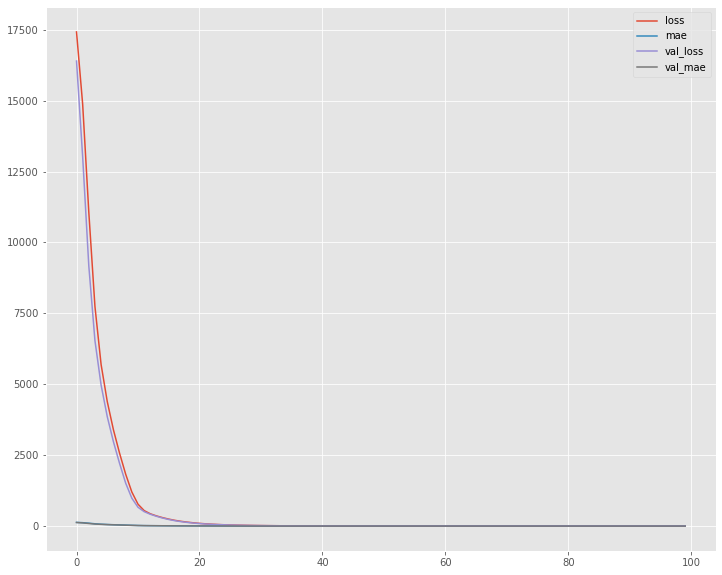

In [25]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [26]:
ann.evaluate(X_train,y_train)

376/376 [==============================] - 1s 2ms/step - loss: 1.1203 - mae: 0.6899


[1.1203224658966064, 0.6898869872093201]

In [27]:
ann.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 1.1012 - mae: 0.6700


[1.101150393486023, 0.6700345873832703]

In [28]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

94/94 [==============================] - 0s 2ms/step


,Real Values,Predictions
0,NaN,134.674393
1,NaN,112.363312
2,NaN,134.406876
3,NaN,134.032700
4,NaN,110.901260
...,...,...
3003,NaN,119.342148
3004,NaN,134.016708
3005,NaN,145.852493
3006,NaN,150.021561


In [29]:
print(y_test.shape)       # The actual values are 1D arrays
print(predictions.shape)  # The predictions are 2D arrays

(3008,)
(3008, 1)


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

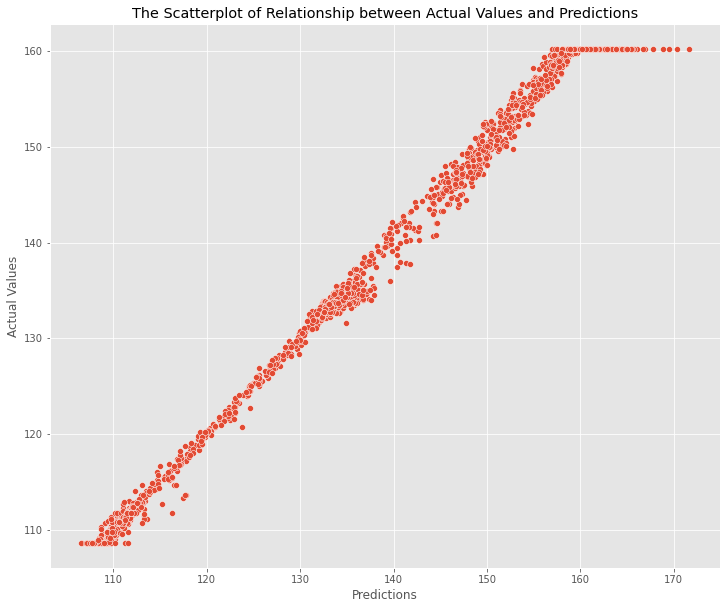

In [30]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(12,10))
sns.scatterplot(np.ravel(predictions),y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [31]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.67003444478867
MSE: 1.1011496101830063
RMSE: 1.0493567602026521


In [32]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions) #This shows our model predict %98 of the target correctly

0.9952447418397882

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred=ann.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [35]:
y_pred

array([[134.6744 ],
       [112.36331],
       [134.40688],
       ...,
       [145.8525 ],
       [150.02156],
       [111.93794]], dtype=float32)

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
rsquared = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(rsquared)

0.67003444478867
1.1011496101830063
1.0493567602026521
0.9952421870290012
